Date: 3/28/2023 <br>
Author: Amparo Godoy Pastore

### Contents
I. Introduction <br>
II. Preliminaries<br>
III. Effectiveness of a Switchable Tumbling Rate: a Statistical Analysis<br>
IV. Relationship Between `alpha2` and the Fraction of Time Near the Food Source<br>
V. Conclusion


# I. Introduction

In this notebook we further explore whether changing the tumbling rate of bacteria's run-and-tumble motion results in a statistically significant difference, and is thus an effective foraging strategy. To analyze the impact of tumbling rate on bacterial behavior, we create boxplots and error bar plots that compare the samples of bacteria that use the run-and-tumble tactic to those where the tumbling rate is constant. Overall, our aim is to understand the statistical significance of our data and prove the effectiveness of food-depending tumbling.

# II. Preliminaries

First we import the necessary libraries, and define the following functions:
 - `food`: gets the concentration of food at any location, 
 - `simulate_bacterium`: simulates the run-and-tumble trajectory of bacteria,
 - `get_time_fraction`: computes the fraction of time spent within a distance d0 of the food source

In [2]:
import numpy as np
from numpy.random import rand, seed
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pickle
from scipy.stats import shapiro, ttest_ind, wilcoxon

In [3]:
# Get the concentration of food at any location.
def food(x,y):
    return 1/(1+norm([x,y], axis=0))

# Simulate a bacterium. Return the trajectory.
# alpha1 is the tumbling rate when the local food concentration is increasing.
# alpha2 is the tumbling rate when the local food concentration is decreasing.
# Typically alpha1 is smaller than alpha2.
def simulate_bacterium(alpha1, alpha2, x0=10, y0=0, θ0=0, v0=1, t_sim=1000, dt=0.1):
    r  = np.array([x0,y0], dtype=np.float64)
    R  = [r.copy()]
    v  = v0*np.array([np.cos(θ0), np.sin(θ0)])
    for t in np.arange(0, t_sim, dt):
        if len(R)>1:
            getting_closer = food(*R[-1])>food(*R[-2])
            if getting_closer:
                α = alpha1
            else:
                α = alpha2
            if rand()<α*dt:
                θ = 2*np.pi*rand()
                v = v0*np.array([np.cos(θ), np.sin(θ)])
        r = r + v*dt
        R.append(r)
    return np.array(R)

# Compute the fraction of time spent within a distance d0 of the food source.
# R is the list of xy coordinates.
def get_time_fraction(R, d0=5):
    d = norm(R, axis=1)
    I = np.nonzero(d<d0)[0]
    return len(I)/len(d)

# III. Effectiveness of a Switchable Tumbling Rate: a Statistical Analysis

In this section we try to answer the following question: _Does switching the tumbling rate make a statistically significant difference?_ 

Since the tumbles are random (each new bacterium simulation yields a different trajectory and a different fraction of time near the food source) we need to show that the observed difference of behavior could not have been caused by this natural, random variations. For this purpose, we will apply a statistical test. We first create two samples of run-and-tumble motion, of size 10 each. The first one is created by simulating the trajectory of the bacteria on a constant tumbling rate $\alpha = 1$, and the second one by performing the simulation on a switchable tumbling rate with $\alpha_1 = 0.5$ and $\alpha_2 = 2$. 

Then, we perform a Shapiro test to assess whether the data obtained from each simulation is normally distributed and we use a Wilcoxon or T test accordingly to compare the two samples and evaluate if they are significantly different. 

<div class="alert alert-block alert-danger">
<b>Task 1</b>
</div>

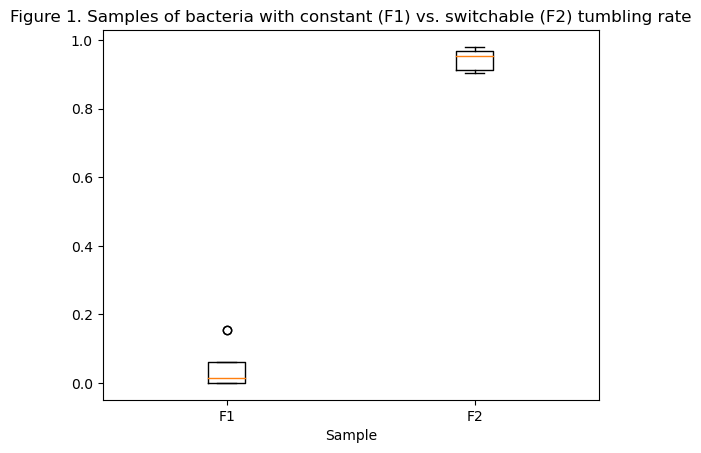

In [4]:
# Simulate bacteria
F1 = [] # constant tumbling rate
F2 = [] # switchable tumbling rate
for i in range(1, 10):
    R = simulate_bacterium(1, 1)
    F1.append(get_time_fraction(R))
    R2 = simulate_bacterium(.5, 2)
    F2.append(get_time_fraction(R2))
    
# Visualize with boxplot
plt.boxplot([F1,F2], labels=['F1','F2'])
plt.xlabel('Sample')
plt.ylabel('')
plt.title('Figure 1. Samples of bacteria with constant (F1) vs. switchable (F2) tumbling rate')
plt.show()

_Figure 1_ provides a visualization for each sample of bacteria's simulated trajectories. Now, we perform the statistical analysis mentioned previously.

In [5]:
# Assess whether each list is normally distributed
# Shapiro test, p value
p1 = shapiro(F1).pvalue
print('p value of F1:', round(p1, 4))
# If the p value is larger than 0.05, we treat the sample as normally distributed.
print('Is F1 normally distributed?', p1>0.05)

# p value from the shapiro test:
p2 = shapiro(F2).pvalue
print('p value of F2:', round(p2, 4))
# If the p value is larger than 0.05, we treat the sample as normally distributed.
print('Is F2 normally distributed?', p2>0.05)

p value of F1: 0.0054
Is F1 normally distributed? False
p value of F2: 0.2868
Is F2 normally distributed? True


In [6]:
# If either sample is not normally distributed, we compare them with a Wilcoxon test, if it is normally distributed we
# use a t test
if p1>0.05 and p2>0.05:
    p = ttest_ind(F1,F2).pvalue
    print('p value from T-test:', round(p, 4))
else:
    p = wilcoxon(F1,F2).pvalue
    print('p value from Wilcoxon test:', round(p, 4))

# If the resulting p value is less than 0.05, we say that the two samples are significantly different
print('Are the samples significantly different?', (p<0.05))

p value from Wilcoxon test: 0.0039
Are the samples significantly different? True


The results of the Shapiro test show that for at least one of the samples $p \geq 0.05$, and thus the sample is not normally distributed. Therefore, we compare the two samples using the Wilcoxon test. The results from this statistical analysis show that the samples are significantly different, confirming that a switchable tumbling rate does notably affect the trajectories of the bacteria. In the next section we look at the functional dependence of the fraction of time spent near a food source on the value of $\alpha$.

# IV. Relationship Between `alpha2` and the Fraction of Time Near the Food Source

We can be more quantitative that "changing the alphas changes the foraging behavior". Here, we compute the time fraction near the food source for $\alpha_1=1$ and various values of $\alpha_2$ ([1, 1.5, 2, 3, 5]), and plot the fraction of time near food as a function of $\alpha_2$.

<div class="alert alert-block alert-danger">
<b>Task 2</b>
</div>

In [7]:
# Simulate bacteria
alpha1 = 1
alpha2 = [1, 1.5, 2, 3, 5]
F = []

for alpha in alpha2:
    Fi = []
    for i in range(1, 10):
        R = simulate_bacterium(alpha1, alpha)
        Fi.append(get_time_fraction(R))
    F.append(Fi)

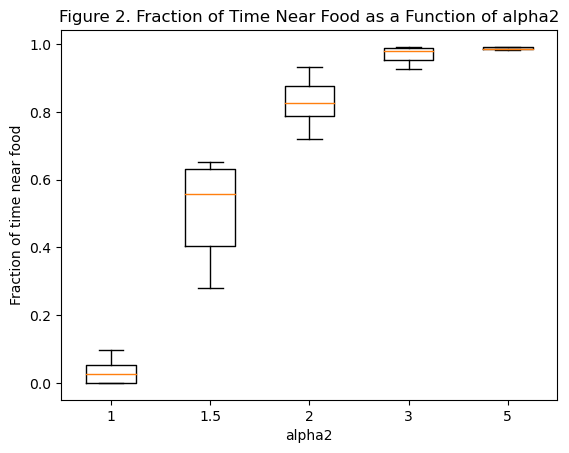

In [8]:
# Boxplot
plt.boxplot(F, labels=alpha2)
plt.xlabel('alpha2')
plt.ylabel('Fraction of time near food')
plt.title('Figure 2. Fraction of Time Near Food as a Function of alpha2')
plt.show()

The boxplot, _Figure 2_, shows the relationship between $\alpha_2$ and the fraction of time that simulated bacteria spend near the food source. As we can see, as $\alpha_2$ increases, the fraction of time spent near the food source also tends to increase. The graph also provides a visual representation of the variability in the data, with larger interquartile ranges indicating more variability in the results. When  $\alpha_2 = 1.5$ the interquartile range is the largest, whereas for  $\alpha_2 = 5$ there is the least variability.  

<div class="alert alert-block alert-danger">
<b>Task 3</b>
</div>

Now, we plot the time fraction as a function of $\alpha_2$ using an errorbar plot, and the samples' means and standard deviations as the centers and half-sizes of the bars respectively.

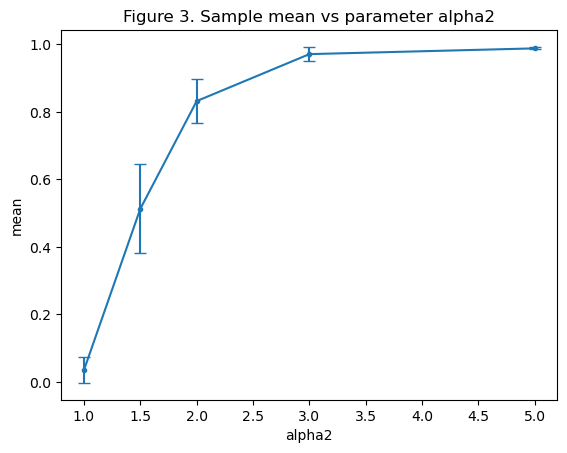

In [9]:
# The list of sample means
X = [np.mean(f) for f in F]
# The list of standard deviations
E = [np.std(f) for f in F]

# Plot
plt.errorbar(alpha2, X, E, capsize=4, marker='.')
plt.xlabel('alpha2')
plt.ylabel('mean')
plt.title('Figure 3. Sample mean vs parameter alpha2')
plt.show()

_Figure 3_ shows the relationship between $\alpha_2$ and the sample mean of the fraction of time that simulated bacteria spend near a food source. The error bars indicate the variability of the data, with the length of each bar representing the standard deviation of the fraction of time near the food source for each value of $\alpha_2$. This errorbar provides a more precise measure of the relationship between $\alpha_2$ and the fraction of time near food, as it displays the means and standard deviations for each value of $\alpha_2$. 

From _Figure 3_ we can see that as $\alpha_2$ increases, the mean fraction of time near food increases as well. 

# V. Conclusion

Throughout this notebook we explored the effectiveness of a food-depending, switchable tumbling rate as a foraging strategy for bacteria. We used statistical analysis to compare two sets of bacterial behavior: one with a constant tumbling rate and another with a tumbling rate that switches between a lower and higher value depending on the local food concentration.

Our results show that the switchable tumbling rate does make a significant difference in bacterial behavior. Specifically, the bacteria with the switchable tumbling rate spent more time near the food source compared to the bacteria with a constant tumbling rate. Thus, we can conclude that a switchable tumbling rate is an effective foraging strategy for bacteria. 